<a href="https://colab.research.google.com/github/vanga23/jpmc-task-1/blob/main/Prediction_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BUILDING A PREDICTIVE MODEL FOR HEART DISEASE**

**Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

**Data Loading and Processing**


Loading the CSV data to Pandas to do various Data Manipulation functions




In [ ]:
df = '/content/collected_data.csv'
heart_data = pd.read_csv(df)

In [ ]:
# Now let's print the first 10 rows of the data frame
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
# Let's find out how many rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
# Let's print the bottom 5 rows of the data frame
heart_data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Now let's find the data frame information
heart_data.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [ ]:
# What is the data type of the whole data frame.?
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Is there any  missing values in the data frame.?
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So there is no null values in the data. It means it is a clean data

In [ ]:
# Now lets describe the data in statistical way
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Calculate the correlation matrix
correlation_matrix = heart_data.corr()

# Display the correlation matrix
print(correlation_matrix)


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

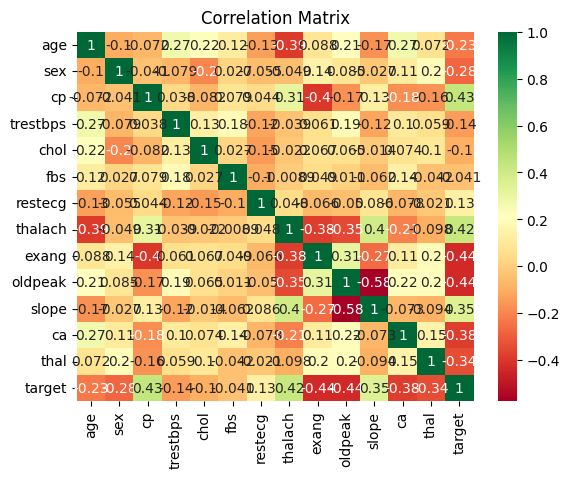

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Matrix")
plt.figure(figsize = (10,10))
plt.show()

In [ ]:
# Identifying features highly correlated with the target variable
target_corr = correlation_matrix["target"].abs().sort_values(ascending=False)
selected_features = target_corr[target_corr > 0.2].index.tolist()

**Feature Extraction**

In [ ]:
# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['target', 'oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age']


**Data Splitting**

Now let's split the data into Training and Testing dataset and also remove Target variable from dataset

In [ ]:
# Separate the features and target variable
X = heart_data.drop("target", axis=1)
Y = heart_data["target"]

# Split the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shape of the training and testing datasets
print("Training dataset shape:", X_train.shape)
print("Testing dataset shape:", X_test.shape)


Training dataset shape: (820, 13)
Testing dataset shape: (205, 13)


In [ ]:
print("Training Data:\n",X_train)
print("Testing Data:\n",X_test)

Training Data:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
835   49    1   2       118   149    0        0      126      0      0.8   
137   64    0   0       180   325    0        1      154      1      0.0   
534   54    0   2       108   267    0        0      167      0      0.0   
495   59    1   0       135   234    0        1      161      0      0.5   
244   51    1   2       125   245    1        0      166      0      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
700   41    1   2       130   214    0        0      168      0      2.0   
71    61    1   0       140   207    0        0      138      1      1.9   
106   51    1   0       140   299    0        1      173      1      1.6   
270   43    1   0       110   211    0        1      161      0      0.0   
860   52    1   0       112   230    0        1      160      0      0.0   

     slope  ca  thal  
835      2   3     2  
137      2   0     2  
53

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

Training The Model with Training Dataset using - **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
model = LogisticRegression()

# Train the model on the training dataset
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation**

Accuracy Score and Confusion Matrix for Training Dataset

In [ ]:
# Make predictions on the training dataset
Y_pred = model.predict(X_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, Y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
confusion_mat = confusion_matrix(Y_train, Y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.8658536585365854
Confusion Matrix:
[[324  73]
 [ 37 386]]


From the above Confusion Matrix:

True Positives (TP): 324

False Negatives (FN): 73

False Positives (FP): 37

True Negatives (TN): 386

Model Evaluation

Accuracy Score and Confusion Matrix for Testing Dataset

In [ ]:
# Make predictions on the testing dataset
X_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, X_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
confusion_mat = confusion_matrix(Y_test, X_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7853658536585366
Confusion Matrix:
[[71 31]
 [13 90]]


From the above Confusion Matrix:

True Positives (TP): 324

False Negatives (FN): 73

False Positives (FP): 37

True Negatives (TN): 386

**Building a Predictive Model**

In [30]:
input_data = (54,1,0,122,286,0,0,116,1,3.2,1,2,2)

#We have to change the data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the data as we predicting for only one set of values
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Person has No Disease..!")
else:
    print("The Person has Disease..!")


[0]
The Person has No Disease..!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
